In [58]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import signal
import pywt

Sources:
Detrending: https://forecastegy.com/posts/detrending-time-series-data-python/
https://towardsdatascience.com/hands-on-signal-processing-with-python-9bda8aad39de
https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

https://www.collimator.ai/reference-guides/what-is-signal-processing#:~:text=Signal%20processing%20techniques%20such%20as%20filtering%2C%20Fourier%20analysis%2C%20wavelet%20analysis,many%20new%20techniques%20and%20applications.

### Signal Processing Techniques
There are many techniques used in signal processing, including:

 - Filtering: This involves removing unwanted frequency components from a signal. There are many types of filters, including low-pass, high-pass, band-pass, and band-stop filters.
 - Fourier analysis: This is a method for representing a signal as a sum of sinusoidal functions. It is used to identify the frequency components of a signal and to analyze its properties.
 - Noise reduction: This involves removing or reducing unwanted noise or interference from a signal. Techniques for noise reduction include filtering, averaging, and the use of noise-canceling algorithms.
 - Compression: This involves reducing the size of a digital signal by removing redundant or unnecessary information. Compression is often used to reduce the size of audio and video files for storage or transmission.
 - Modulation: This involves encoding information onto a carrier signal for transmission over a communication channel. There are many types of modulation, including amplitude, frequency, and phase modulation.
 - Demodulation: This is the process of extracting the original information from a modulated signal. It is the inverse of the modulation process.

#### Algorithms
There are many algorithms used in signal processing. Here is a brief explanation of each of the signal-processing algorithms:

 - Convolution: This is an algorithm that is used to perform filtering, prediction, and smoothing of signals. It involves multiplying a signal by a kernel function, which defines the shape of the filter. Convolution can be used to implement a wide range of filters, including low-pass, high-pass, band-pass, and band-stop filters.
 - Fast Fourier transform (FFT): This is an efficient algorithm for computing the discrete Fourier transform of a signal. It is widely used for spectral analysis and for evaluating the frequency content of signals. The Fourier transform decomposes a signal into its constituent frequency components, which can be used to analyze and modify the signal.
 - Correlation: This is an algorithm that is used to measure the similarity between two signals. It is often used for pattern recognition and for finding the delay between two signals. Correlation involves comparing the signals at each time point and computing a similarity score based on the degree of overlap.
 - Adaptive filtering: This is a class of algorithms that can adapt to changing signals or environments. They are often used for noise reduction and for equalizing channels in communication systems. Adaptive filters adjust their response based on the input signal, allowing them to adapt to changing conditions.
 - Kalman filtering: This is an algorithm that is used to estimate the state of a dynamic system from noisy measurements. It is widely used for tracking and prediction in a variety of applications. Kalman filtering uses a model of the system to predict the future state and then updates this prediction based on the measured data.
 - Wavelet transform: This is an algorithm that is used to represent signals in terms of wavelets, which are functions with localized frequency content. It is often used for denoising and for analyzing signals with time-varying frequency content. The wavelet transform decomposes a signal into wavelets with different scales and locations, allowing for a more fine-grained analysis of the signal.
 - Compression algorithms: These algorithms are used to reduce the size of digital signals by removing redundant or unnecessary information. Examples include the discrete cosine transform and the discrete wavelet transform. Compression algorithms typically operate by identifying and removing redundancies in the signal, such as repeating patterns or statistical dependencies.



# Notebook

In [59]:
data_fft = pd.read_csv('./data/AEP_hourly.csv')

In [60]:
data_fft.tail()

,Datetime,AEP_MW
121268,2018-01-01 20:00:00,21089.0
121269,2018-01-01 21:00:00,20999.0
121270,2018-01-01 22:00:00,20820.0
121271,2018-01-01 23:00:00,20415.0
121272,2018-01-02 00:00:00,19993.0


In [61]:

data_fft.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


Text(0, 0.5, 'MW Energy Consumption')

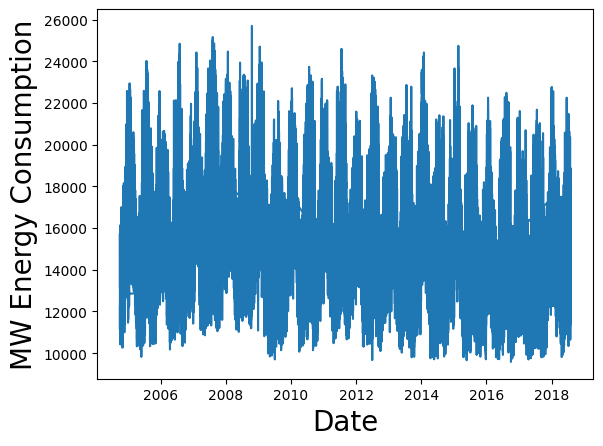

In [62]:
y = np.array(data_fft.AEP_MW)
x = data_fft.index
date_array = pd.to_datetime(data_fft.Datetime)
plt.plot(date_array,y)
plt.xlabel('Date',fontsize=20)
plt.ylabel('MW Energy Consumption',fontsize=20)

We can see that it has a kind of trend and it has not zero mean. These two features can disturb our analysis. Let’s correct it using the detrend option of scipy.

https://forecastegy.com/posts/detrending-time-series-data-python/

### What Is Detrending?

Time series data is a collection of observations made over time. These observations may exhibit a trend.

In plain English, a trend means that the values of the time series may increase or decrease over time. For example, the number of visitors to a website may increase as the website becomes more popular.

Sometimes we want to analyze the data without the trend to capture other patterns like seasonality or noise. In these situations, detrending can help us.

We assume the time series is an additive combination of a trend and other components.



Y(t)=T(t)+S(t)+e(t)

Here:
 - Y(t) is the original time series
 - T(t) is the trend
 - S(t) is the seasonal component
 - e(t) is the noise

 
So, to detrend a time series, we need to estimate the trend component and then subtract it from the original data, leaving us with only the seasonal component and the noise.

I will use a time series with monthly historical temperature in my city (Sao Paulo, Brazil) to demonstrate how you can perform detrending in Python.

Text(0, 0.5, 'Temperature')

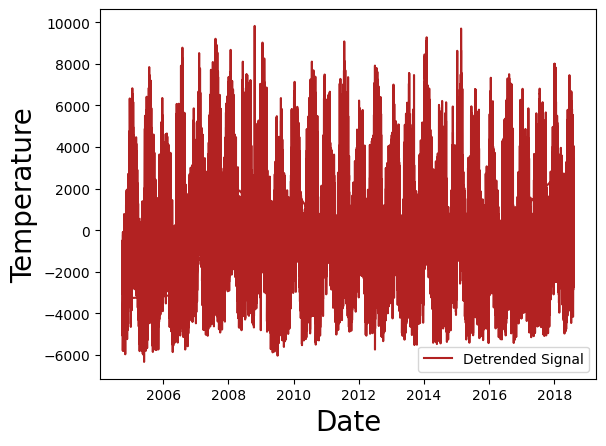

In [63]:
y_detrend = signal.detrend(y, type='linear')
plt.plot(date_array, y_detrend,color='firebrick',label='Detrended Signal')
plt.legend()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Temperature',fontsize=20)

Text(0, 0.5, 'Temperature')

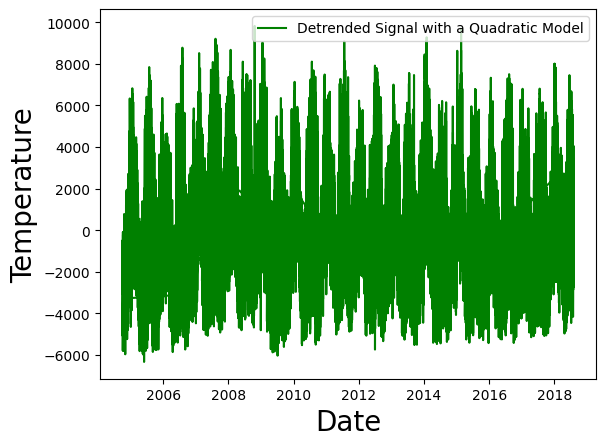

In [64]:
### Detrending with a Quadratic model using statsmodels detrend.


from statsmodels.tsa.tsatools import detrend

detrended = detrend(y, order=2)
plt.plot(date_array, y_detrend,color='green',label='Detrended Signal with a Quadratic Model')
plt.legend()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Temperature',fontsize=20)

Text(0, 0.5, 'Temperature')

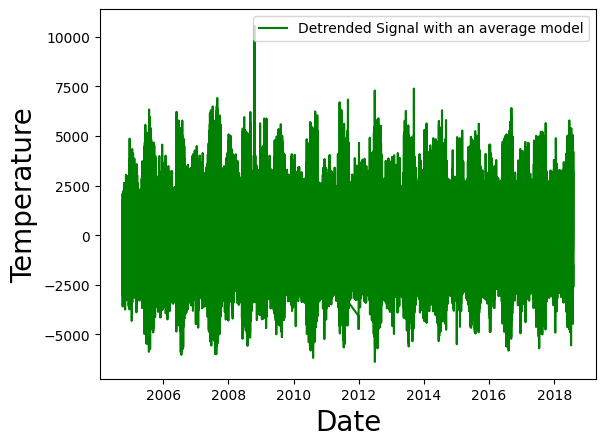

In [65]:
### Detrending a moving average model.

rolling_mean = data_fft['AEP_MW'].rolling(window=200, center=True).mean()
y_detrended_average = data_fft['AEP_MW'] - rolling_mean

plt.plot(date_array, y_detrended_average,color='green',label='Detrended Signal with an average model')
plt.legend()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Temperature',fontsize=20)

## 2.3 Frequency Analysis

Fourier Trnasform

(0.0, 200.0)

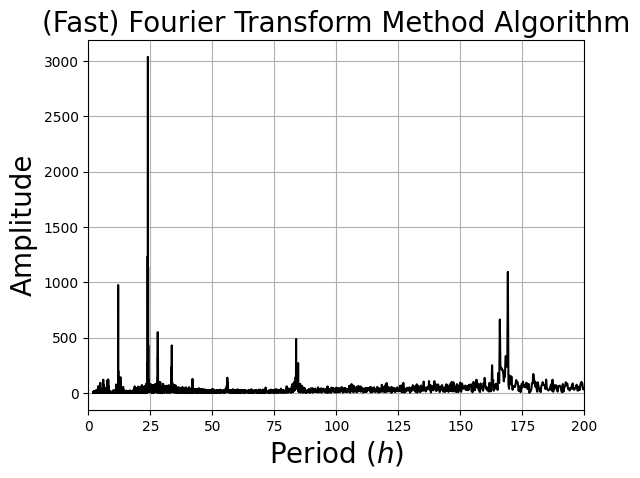

In [67]:
FFT =np.fft.fft(y_detrend)
new_N=int(len(FFT)/2) 
f_nat=1
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X)
FFT_abs=np.abs(FFT)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='black')
plt.xlabel('Period ($h$)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=20)
plt.grid(True)
plt.xlim(0,200)

In [70]:
fft_abs = 2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)
fft_abs = pd.DataFrame(fft_abs, columns = ['Amplitude'])
fft_sorted = fft_abs.sort_values(by='Amplitude',ascending=False)
fft_sorted.head(20)

,Amplitude
5054,3037.558970
28,2556.509851
27,1636.961921
5068,1235.815611
5040,1137.886002
5055,1105.313718
717,1094.463940
10108,975.280091
10109,932.572475
14,895.208752


In [71]:
fft_sorted.index/24

Index([210.58333333333334, 1.1666666666666667,              1.125,
       211.16666666666666,              210.0,            210.625,
                   29.875,  421.1666666666667,  421.2083333333333,
       0.5833333333333334,
       ...
                 1781.375,  951.0833333333334, 2032.1666666666667,
                 1140.125, 1825.5416666666667, 1788.5833333333333,
       1753.9166666666667, 1961.9583333333333, 1974.2083333333333,
                      0.0],
      dtype='float64', length=60636)

#### Filtering the amplitude

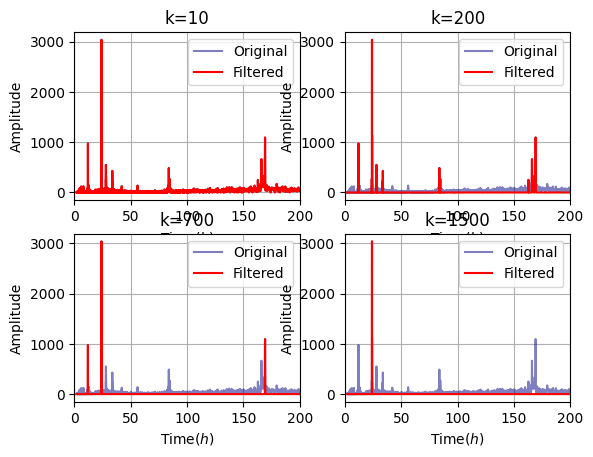

<Figure size 4000x4000 with 0 Axes>

In [76]:
#Defining the filtering function
def fft_filter(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof



#Showing the plots at different thresholds values
#Defining the amplitude filtering function
def fft_filter_amp(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

K_plot=[10,200,700,1500]
j=0
for k in K_plot:
    j=j+1
    plt.subplot(2,2,j)
    plt.title('k=%i'%(k))
    plt.xlim(0,200)
    plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='navy',alpha=0.5,label='Original')
    plt.grid(True)
    
    plt.plot(new_Xph,fft_filter_amp(k),'red',label='Filtered')
    plt.xlabel('Time($h$)')
    plt.ylabel('Amplitude')
    plt.legend()
plt.figure(figsize=[40,40])
plt.subplots_adjust(hspace=0.5)


In [77]:
def fft_filter(perc):
    th=perc*(2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


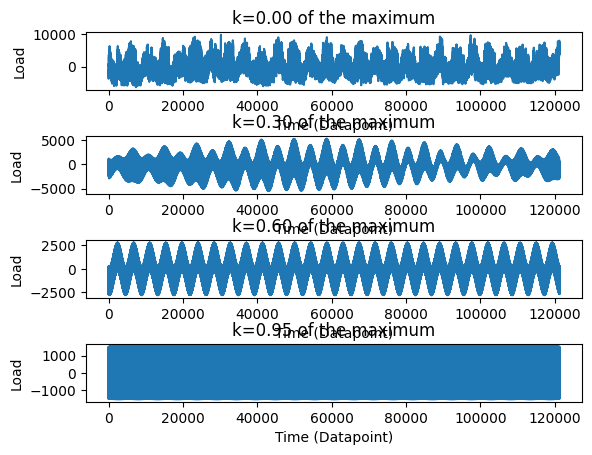

In [79]:
#Showing some plots at different threshold values
K_plot_values=[0.0,0.30,0.60,0.95]
j=0
for k in K_plot_values:
    j+=1
    plt.subplot(4,1,j)
    plt.plot(x,np.fft.ifft(fft_filter(k)))
    plt.title('k=%.2f of the maximum' %(k))
    plt.xlabel('Time (Datapoint)')
    plt.ylabel('Load')
plt.subplots_adjust(hspace=0.8)

In [81]:
th_list = np.linspace(0,1,5)
th_list = th_list[0:len(th_list)-1]
th_list

array([0.  , 0.25, 0.5 , 0.75])